In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/distan_lat43.302lon-8.377p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M              74.09%
BCFG            7.01%
FG              3.61%
-RA             2.10%
BR              1.55%
RA              1.21%
-RA BCFG        0.99%
RA BCFG         0.67%
BCFG -RA        0.66%
-RA BR          0.58%
RA FG           0.56%
-RA FG          0.56%
RA BR           0.55%
BCFG RA         0.50%
SHRA            0.42%
-DZ             0.34%
VCFG            0.33%
FG DZ           0.30%
FG -RA          0.29%
BCFG -DZ        0.22%
DZ              0.21%
FG RA           0.19%
-DZ FG          0.19%
FG -DZ          0.17%
DZ BCFG         0.16%
+RA FG          0.16%
DZ FG           0.15%
BCFG DZ         0.15%
DZ BR           0.13%
-DZ BCFG        0.13%
-RADZ BCFG      0.13%
-DZ BR          0.13%
+RA BCFG        0.10%
-RADZ           0.10%
+DZ FG          0.09%
-SHRA           0.09%
-RADZ BR        0.08%
+SHRA           0.07%
+RA BR          0.07%
BR RA           0.07%
+RA             0.07%
TS              0.07%
BR -DZ          0.06%
-RADZ FG        0.05%
FG -RADZ        0.05%
BR -RA    

In [3]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2019-12-25 04:00:00         M  No RA/DZ
2018-09-17 02:30:00         M  No RA/DZ
2019-12-10 01:30:00         M  No RA/DZ
2020-12-10 18:30:00  BCFG -RA     RA/DZ
2018-12-01 08:30:00         M  No RA/DZ
2019-02-06 22:48:00    +DZ BR     RA/DZ
2020-04-29 22:30:00         M  No RA/DZ
2018-09-22 15:00:00         M  No RA/DZ
2020-03-31 09:30:00         M  No RA/DZ
2018-09-15 07:00:00         M  No RA/DZ
2018-12-10 13:00:00         M  No RA/DZ
2018-10-07 06:30:00         M  No RA/DZ
2020-10-28 16:30:00         M  No RA/DZ
2020-10-20 03:00:00         M  No RA/DZ
2018-10-12 04:30:00         M  No RA/DZ
2020-03-15 19:00:00         M  No RA/DZ
2019-05-03 08:30:00         M  No RA/DZ
2019-02-22 15:00:00         M  No RA/DZ
2018-09-29 22:00:00         M  No RA/DZ
2020-08-13 12:00:00         M  No RA/DZ
2020-09-10 13:00:00         M  No RA/DZ
2019-07-14 02:30:00        FG  No RA/DZ
2018-12-18 15:00:00         M  No RA/DZ


No RA/DZ    87%
RA/DZ       13%
Name: prec_l, dtype: object

**Load model**

In [4]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LECO/input_files/lat43.302lon-8.377p4R4KmD1Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,232.116882,0.0,1536.151245,6.673357,15.847702,102913.742188,287.020935,0.878536,24035.375000,14.237828,...,0.000000,-0.000438,0.000000,0.089097,0.000000,0.089097,5693.558105,1584.069946,254.864120,278.437256
2018-01-02 01:00:00,231.433868,0.0,1600.927490,7.663245,16.997808,102830.460938,287.384613,0.866039,24233.882812,18.512604,...,0.000000,-0.000438,0.000000,0.500000,0.200000,0.500000,5691.708008,1580.140015,254.976685,279.093506
2018-01-02 02:00:00,230.558472,0.0,1614.554321,7.296363,16.141504,102797.046875,287.456238,0.874109,24232.816406,16.743593,...,0.000000,-0.000105,0.000000,0.254035,0.343750,0.343750,5690.079102,1577.298950,255.064560,279.292755
2018-01-02 03:00:00,234.801254,0.0,1622.880859,6.550061,14.820992,102707.976562,287.640747,0.884587,4635.833984,15.291382,...,0.000000,-0.000125,0.289062,0.531250,0.734375,0.734375,5690.610840,1572.140015,254.839066,279.247864
2018-01-02 04:00:00,233.509735,0.0,1698.536133,7.280656,16.431499,102714.929688,287.973114,0.864839,24233.916016,19.287750,...,0.000000,0.000562,0.400000,0.656250,0.515625,0.656250,5690.393066,1574.123047,255.089691,280.121765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,222.438339,0.0,1413.273926,3.480232,8.724230,101416.109375,284.580383,0.828276,24046.664062,9.276939,...,69.529999,-15.124957,0.400000,0.000000,0.000000,0.400000,5472.100098,1437.536987,252.078400,275.643860
2023-01-01 20:00:00,236.080597,0.0,1425.150757,4.493026,9.884865,101530.671875,284.500244,0.859321,24048.144531,9.792046,...,118.860001,-13.584320,0.300000,0.000000,0.000000,0.300000,5467.734863,1445.677002,250.850891,275.983063
2023-01-01 21:00:00,243.114624,0.0,1374.339600,4.680808,9.837169,101588.718750,284.540619,0.847495,24051.210938,11.269343,...,155.720001,-13.667031,0.500000,0.200000,0.000000,0.500000,5461.733887,1450.810913,249.648865,275.520691


In [5]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2020-11-21 02:00:00,No RA/DZ,137.080063,0.0,2453.854248,1.720123,3.528538,102951.585938,281.813873,0.919307,24135.000000,...,0.000000,0.000000,0.061446,0.000000,0.00000,0.061446,5799.879883,1606.887573,259.338074,284.600067
2020-01-09 06:00:00,No RA/DZ,213.537903,0.0,1960.161133,5.614680,12.266527,102384.117188,286.610443,0.922182,24035.492188,...,0.000000,0.000500,0.100000,0.400000,0.10000,0.400000,5679.136230,1543.833984,256.268188,280.209808
2018-12-06 05:00:00,No RA/DZ,212.213776,0.0,1994.491455,1.854504,6.350383,102902.703125,284.036743,0.921437,24232.197266,...,0.000000,-0.000379,0.180000,0.000000,0.00000,0.180000,5789.019043,1584.032227,261.256500,280.973389
2020-10-06 02:00:00,RA/DZ,243.499405,0.0,2608.276123,4.311320,9.707524,101899.585938,290.542511,0.919961,24036.625000,...,0.000000,0.000453,0.200000,0.400000,0.00000,0.400000,5735.597168,1520.317993,263.017365,283.919800
2018-10-28 03:00:00,No RA/DZ,29.069914,0.0,482.484375,4.492783,11.989618,101072.820312,283.869568,0.743926,24055.119141,...,220.220001,-25.585625,0.000000,0.500000,0.31250,0.500000,5355.488770,1399.186035,242.772690,272.327515
2019-08-11 08:00:00,No RA/DZ,210.434784,0.0,1862.254883,2.628386,4.148891,101985.148438,289.451263,0.835779,24051.349609,...,1.500000,-29.821438,0.400000,0.370000,0.20000,0.400000,5622.283203,1513.040771,253.639191,279.477386
2020-09-01 06:00:00,No RA/DZ,196.729706,0.0,2452.478027,0.408681,0.852736,101758.468750,285.364136,0.995142,24135.000000,...,0.000000,-0.000293,0.000000,0.000000,0.00000,0.000000,5690.080078,1500.602051,260.010498,284.168823
2018-10-31 19:00:00,No RA/DZ,319.120697,0.0,1267.472046,4.440698,10.870543,100569.117188,286.885437,0.870432,24038.636719,...,163.860001,-4.802969,0.100000,0.425725,0.00000,0.425725,5445.775879,1372.143311,252.523819,277.124756
2019-11-19 19:00:00,RA/DZ,230.389816,0.0,1277.325195,1.507749,3.618225,100925.601562,284.802887,0.910986,24057.851562,...,8.720000,-16.248398,0.300000,0.200000,0.00000,0.300000,5456.320801,1395.526855,250.259369,275.667877


**Scatter plot significant meteorological variables and prec_l**

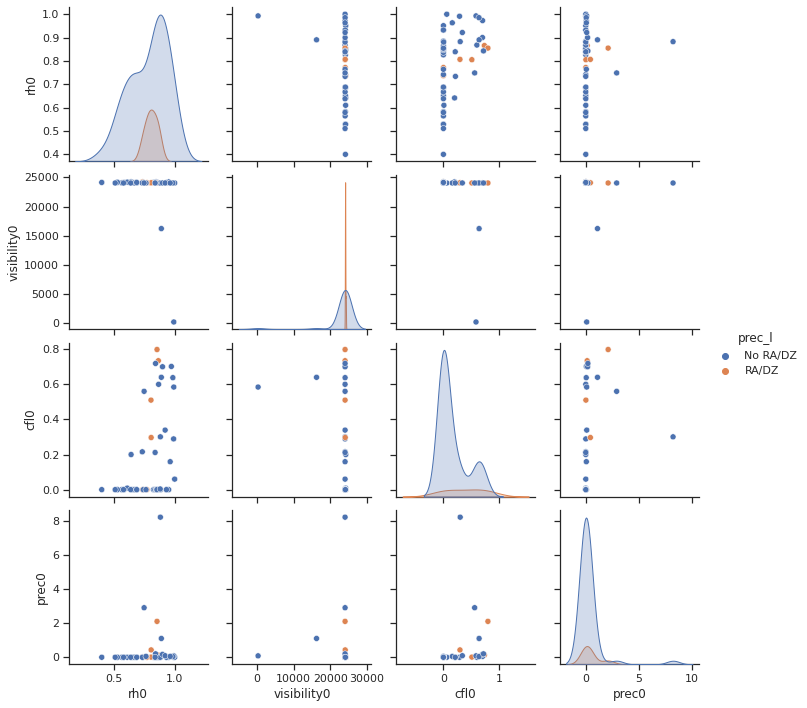

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

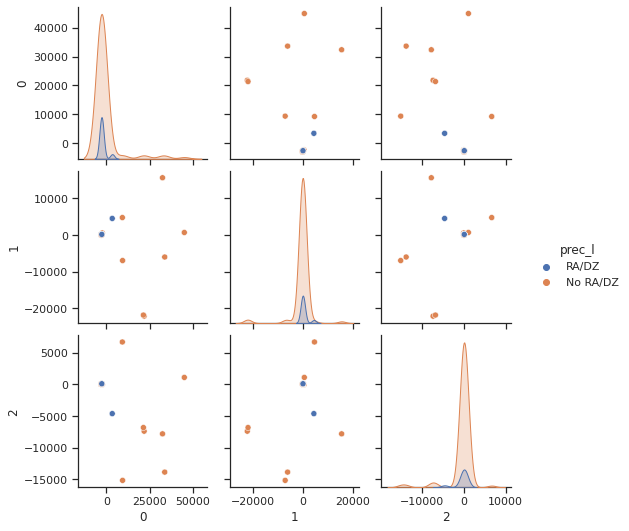

In [7]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [8]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     12921   4729  17650
RA/DZ          905   1387   2292
All          13826   6116  19942
Heidke Skill Score: 0.2

Quality report Meteorological model point 0
              precision    recall  f1-score       support
No RA/DZ       0.934544  0.732068  0.821006  17650.000000
RA/DZ          0.226782  0.605148  0.329924   2292.000000
accuracy       0.717481  0.717481  0.717481      0.717481
macro avg      0.580663  0.668608  0.575465  19942.000000
weighted avg   0.853198  0.717481  0.764565  19942.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     12985   4665  17650
RA/DZ          801   1491   2292
All          13786   6156  19942
Heidke Skill Score: 0.22

Quality report Meteorological model point 1
              precision    recall  f1-score       support
No RA/DZ       0.941898  0.735694  0.826123  17650.000000
RA/DZ          0.242203  0.650524  0.35298

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [9]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 6.59185383886163e-310
Significance level: 0.01
Degres of of freedom:  1
Stadistic 1416.122418164622
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [10]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3318    229  3547
RA/DZ          170    272   442
All           3488    501  3989
Heidke Skill Score: 0.52

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.951261  0.935438  0.943284  3547.000000
RA/DZ          0.542914  0.615385  0.576882   442.000000
accuracy       0.899975  0.899975  0.899975     0.899975
macro avg      0.747088  0.775412  0.760083  3989.000000
weighted avg   0.906015  0.899975  0.902685  3989.000000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3268    229  3497
RA/DZ          192    300   492
All           3460    529  3989
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.944509  0.934515  0.939485  3497.00000
RA/DZ          0.567108  0

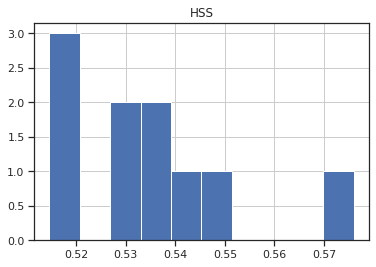

In [11]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.22) and at point 1 (0.2). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [12]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.2, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.52 0.53 0.54 0.52 0.55 0.53 0.53 0.54 0.58 0.51]

p_value point 0: 2.5323054257822625e-13

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [13]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [15]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3338    209  3547
RA/DZ          174    268   442
All           3512    477  3989
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.950456  0.941077  0.945743  3547.000000
RA/DZ          0.561845  0.606335  0.583243   442.000000
accuracy       0.903986  0.903986  0.903986     0.903986
macro avg      0.756150  0.773706  0.764493  3989.000000
weighted avg   0.907396  0.903986  0.905576  3989.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3278    219  3497
RA/DZ          185    307   492
All           3463    526  3989
Heidke Skill Score: 0.55

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.946578  0.937375  0.941954  3497.000000
RA/DZ          0.583650  0

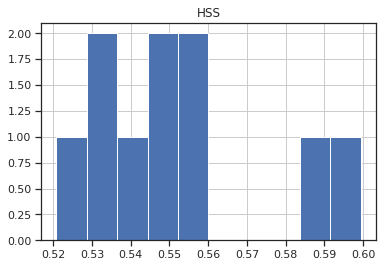

In [16]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [17]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.52  0.527 0.541 0.52  0.547 0.535 0.53  0.539 0.576 0.515]

HSS with time variables: [0.529 0.545 0.555 0.521 0.589 0.545 0.529 0.559 0.599 0.543]

alpha:  0.01

p_value point:  0.0015783976791396038

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


****

**Save Machine learning model**

In [18]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LECO_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [19]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3303    244  3547
RA/DZ          135    307   442
All           3438    551  3989
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.960733  0.931209  0.945741  3547.000000
RA/DZ          0.557169  0.694570  0.618328   442.000000
accuracy       0.904989  0.904989  0.904989     0.904989
macro avg      0.758951  0.812890  0.782035  3989.000000
weighted avg   0.916016  0.904989  0.909462  3989.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      3300    215  3515
RA/DZ          144    330   474
All           3444    545  3989
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.958188  0.938834  0.948412  3515.000000
RA/DZ          0.605505  0.

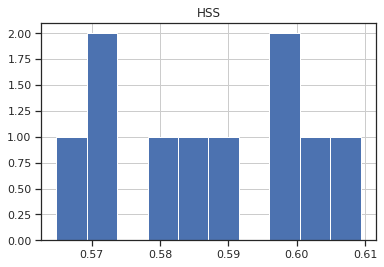

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [21]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.529 0.545 0.555 0.521 0.589 0.545 0.529 0.559 0.599 0.543]

HSS with ExtraTreesClassifier: [0.565 0.596 0.609 0.59  0.57  0.58  0.572 0.583 0.601 0.596]

alpha:  0.01

p_value point:  0.0012590155630660728

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
